In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Read Task_A_rater_001.xlsx file
task_a_rater_001_path = "ExpertRatings/Task_A_rater_001.xlsx"
task_a_rater_001_df = pd.read_excel(task_a_rater_001_path, engine='openpyxl')

# Read secret_master.xlsx file
secret_master_path = "ExpertRatings/secret_master.xlsx"
secret_master_df = pd.read_excel(secret_master_path, engine='openpyxl')


In [3]:
# Merge the DataFrames on the 'index' column
merged_df = pd.merge(task_a_rater_001_df, secret_master_df[['index', 'AGI', 'Task', 'GPT', 'Run', 'Table Index']], on='index', how='left')


In [4]:
# Calculate mean values for each unique combination of 'AGI', 'Task', and 'GPT' for both columns
grouped_means = merged_df.groupby(['AGI', 'Task', 'GPT'])[['Factually correct 1-10', 'Detailed 1-10 (examples are good)']].mean().reset_index()

color_mapping = {
    'BabyAGI': 'salmon',
    'Camel': 'cornflowerblue',
    'Vanilla': 'lightgreen',
    'ChainOfThought': 'lightyellow',
}

grouped_means['plot_color'] = grouped_means['AGI'].map(color_mapping)


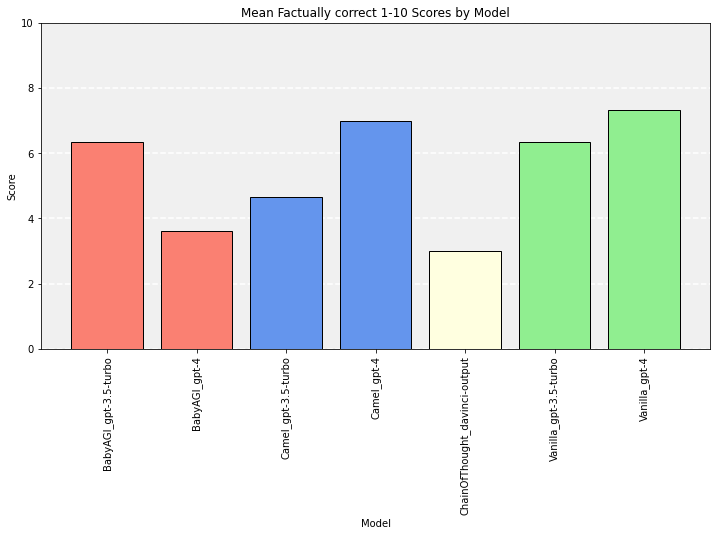

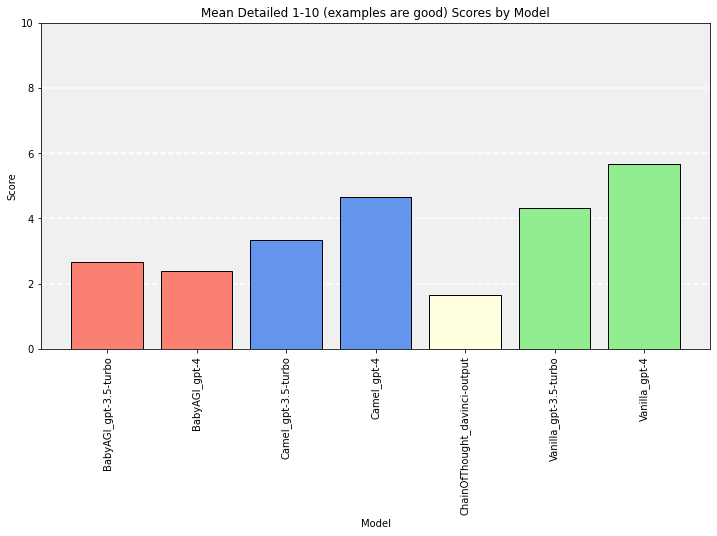

In [5]:


# Create a new column that combines 'AGI', 'Task', and 'GPT' values as a single string
grouped_means['Model'] = grouped_means.apply(lambda row: f"{row['AGI']}_{row['GPT']}", axis=1)




def plot_mean_values(column_name, ax, y_axis_range=(0, 10)):
    ax.bar(grouped_means['Model'], grouped_means[column_name], color=grouped_means['plot_color'], edgecolor='black', zorder=3)
    ax.set_title(f"Mean {column_name} Scores by Model")
    ax.set_xlabel("Model")
    ax.set_ylabel("Score")
    ax.set_ylim(y_axis_range)
    
    # Set background color and gridline style
    ax.set_facecolor('#f0f0f0')  # Light gray background color
    ax.yaxis.grid(True, linestyle='--', which='both', zorder=1, color='white', linewidth=1.5)  # White gridlines
    
    plt.sca(ax)
    plt.xticks(range(len(grouped_means)), grouped_means['Model'], rotation=90)







fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
plot_mean_values("Factually correct 1-10", ax1)
plt.show()

fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
plot_mean_values("Detailed 1-10 (examples are good)", ax1, y_axis_range=(0, 10))
plt.show()


